service_rate 18.0
       qs     ar    sr         a        va         s  vs         u         l  \
0     MD1    0.0  18.0       inf       inf  0.055556   0  0.000000  0.000000   
1     MD1    0.5  18.0       inf       inf  0.055556   0  0.000000  0.000000   
2     MD1    1.0  18.0       inf       inf  0.055556   0  0.000000  0.000000   
3     MD1    1.5  18.0       inf       inf  0.055556   0  0.000000  0.000000   
4     MD1    2.0  18.0       inf       inf  0.055556   0  0.000000  0.000000   
...   ...    ...   ...       ...       ...       ...  ..       ...       ...   
1402  MD1  106.0  18.0  0.084906  0.007209  0.055556   0  0.654321  1.273589   
1403  MD1  106.5  18.0  0.084507  0.007141  0.055556   0  0.657407  1.288163   
1404  MD1  107.0  18.0  0.084112  0.007075  0.055556   0  0.660494  1.302974   
1405  MD1  107.5  18.0  0.083721  0.007009  0.055556   0  0.663580  1.318029   
1406  MD1  108.0  18.0  0.083333  0.006944  0.055556   0  0.666667  1.333333   

            lq       

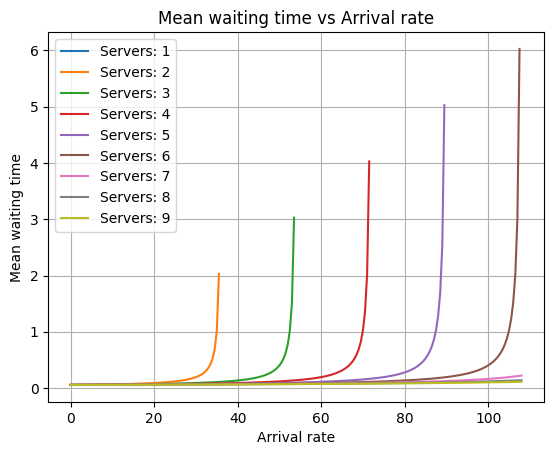

In [4]:
#
#   Example 4: Finding maximum arrival rate to ensure that mean 
#   waiting time is below critical
#
#   Author: Paulius Tervydis
#   Date: 2023-07-09
# 
# ==============================================================
#             Single Server Queueing System (ssqs)
#               +-----------------------------+
#    Arrival    |                  Server     |    Output 
#               |    Queue    +--------------+|     
#  arrival_rate | ----------+ |              ||      
#  ------------>|   | | | | | | service_rate || ------------>
#               | ----------+ |              ||
#               |             +--------------+|   
#               +-----------------------------+
#
# System notation (A/B/1):
# A - distribution of inter-arrival time 
# B - distribution of service time is determined
# 1 - single server
# 
# Distribution types: 
# M - exponential, 
# D - determined (fixed), 
# G - general (time variance must be provided))
# ==============================================================

from qsystems import ssqs, msqs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# --------------------------------------------------------------
# System initial parameters:
# --------------------------------------------------------------
# List of queueing systems to be evaluated

# arrival_rate_total = 500 # [req/h]
 
system_notation = ["MD1"] 

# Server parameters
# service_rate = 100 # [entities/t.u.]

server_no = 10
service_time_sec = 200 # single server
service_time = service_time_sec/3600
service_rate = 1/service_time
print("service_rate",service_rate)

# Arrival parameters
arrival_rate_start = 0 # [entities/t.u.], for example [users/hour]
arrival_rate_stop = 0.6 * service_rate * server_no
arrival_rate_step = 0.5
# Note: For stable system arrival_rate must be < service_rate
# --------------------------------------------------------------

# --------------------------------------------------------------
# Example how to estimate dependence of system parameters on arrival time.
# Results are stored in pandas dataframe. 
# 
arrival_rate_array = np.arange(arrival_rate_start,
                               arrival_rate_stop+arrival_rate_step,
                               arrival_rate_step)

param_df = pd.DataFrame()
for server_no in range(1,10):
    for q_system in system_notation:
        for arrival_rate in arrival_rate_array:
            # print(q_system)
            if arrival_rate/server_no < service_rate:
                sys_params = msqs(ar=arrival_rate,sn = server_no, qs=q_system,sr1=service_rate )
                df = pd.DataFrame(sys_params,index=[0])
                param_df  = pd.concat([param_df ,df], axis=0)
param_df.reset_index(drop=True, inplace=True)

print(param_df)

# --------------------------------------------------------------
# Having such data it is possible to estimate how system parameters depend on 
# arrival rate. It can be used to ensure quality of service requirements.
# As it was shown in the Example 2 - system parameters highly depend
# on arrival rate or utilization.
# For example, if it is necessary to achieve that mean waiting time is
# below critical, then the maximum arrival rate can be determined.
#
# waiting_time_critical_sec = 300
# waiting_time_critical = waiting_time_critical_sec/3600
# print(waiting_time_critical)

# # Finding what is the maximum arrival rate to ensure that mean waiting time is < critical value
# max_arrival_rate_at_critical_waiting_time = {}
# for q_system in system_notation:
#     row_found = param_df[(param_df['w']<=waiting_time_critical) & (param_df['qs']==q_system)].tail(1)
#     max_arrival_rate_at_critical_waiting_time[q_system] = float(row_found['ar'].iloc[0])

# print("Max arrival rate at critical mean waiting time",
#       max_arrival_rate_at_critical_waiting_time)


# # --------------------------------------------------------------
# # Plot Waiting times vs Arrival rate 
# #
plt.figure()
for q_system in system_notation:
    for server_no in range(1,10):
        plot_data_x = param_df[(param_df["qs"]==q_system)&(param_df["sn"]==server_no)]['ar']
        plot_data_y = param_df[(param_df["qs"]==q_system)&(param_df["sn"]==server_no)]['w']
        print(plot_data_x)
        plt.plot(plot_data_x,plot_data_y,label="Servers: "+str(server_no))#+
    #             ": arrival rate (at critical mean waiting time) = %.2f"%
    #             max_arrival_rate_at_critical_waiting_time[q_system])
    # plt.axvline(max_arrival_rate_at_critical_waiting_time[q_system],
    #             color='black')
# plt.axhline(waiting_time_critical,color='red')
# plt.text(0,waiting_time_critical,'critical mean waiting time')
plt.xlabel("Arrival rate")
plt.ylabel("Mean waiting time")
plt.title("Mean waiting time vs Arrival rate")
plt.legend()
plt.grid()
plt.ylim(0,1)
plt.show()